# Exercise 2 - Regression with Neural Networks

Having tried a classification problem, this exercise requires you to train a neural network to solve a regression problem - the California house price data.

In [92]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [93]:
data = fetch_california_housing()
inputs = data["data"]
targets = data["target"]

Once you've loaded the data, plot any two of the columns against each other 

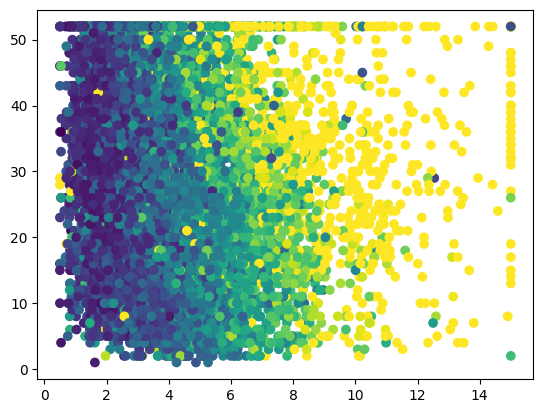

In [94]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets, cmap="viridis")
plt.savefig("california_housing_data.png", bbox_inches="tight")
plt.show()

# Exercise 3 - Normalise the Data

You've loaded the data, its now time to pre-process the data by normalising. Use the `MinMaxScaler` to normalise the input values lie between 0 and 1.

Once you've normalised the values you can use the `ptp` method to print the difference between the maximum
and minimum values for each input.


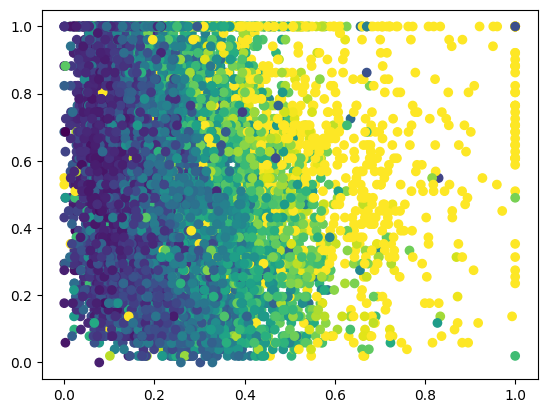

In [95]:
scaler = MinMaxScaler()
scaler.fit(inputs)

scaled_inputs = scaler.transform(inputs)

plt.scatter(scaled_inputs[:, 0], scaled_inputs[:, 1], c=targets, cmap="viridis")
plt.savefig("scaled_california_housing_data.png", bbox_inches="tight")
plt.show()

In [96]:
print(inputs.ptp(axis=0))
print(scaled_inputs.ptp(axis=0))

[1.45002000e+01 5.10000000e+01 1.41062937e+02 3.37333333e+01
 3.56790000e+04 1.24264103e+03 9.41000000e+00 1.00400000e+01]
[1. 1. 1. 1. 1. 1. 1. 1.]


# Exercise 4 - Train the Model

The data is now pre-processed and ready for modelling. Use the `MLPRegressor` as shown in the lecture to
train a neural network that predicts house prices.

In [97]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_inputs, targets, test_size=0.1, random_state=42)

In [98]:
regressor = MLPRegressor(activation="relu", max_iter=1000, early_stopping=True)
regressor.fit(X_train, y_train)
outputs = regressor.predict(X_test)

In [99]:
mae = mean_absolute_error(y_test, outputs)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.39855802528623635


> Mean Absolute Error: 0.39855802528623635